In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,yes,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,no,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,no,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,no,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,NaN,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,NaN,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,NaN,0


In [3]:
data.drop(['id'], axis = 'columns', inplace = True)


In [4]:
data.drop(['work_type'], axis = 'columns', inplace = True)


In [5]:
data.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoker               3772
stroke                  0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
i=SimpleImputer()
i = i.fit(data[['bmi']])
data[['bmi']] = i.transform(data[['bmi']])


In [7]:
data.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoker               3772
stroke                  0
dtype: int64

In [8]:
data= data.dropna(axis=0)
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,yes,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,no,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,no,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,no,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,no,1
...,...,...,...,...,...,...,...,...,...,...
1333,Female,56.0,0,1,Yes,Rural,64.66,26.700000,no,0
1334,Female,26.0,0,0,Yes,Rural,91.88,24.900000,no,0
1335,Female,75.0,0,0,Yes,Rural,74.79,32.400000,no,0
1336,Female,44.0,0,0,No,Rural,78.18,32.200000,no,0


In [9]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [10]:
data['smoker']=l.fit_transform(data[['smoker']])
data['ever_married']=l.fit_transform(data[['ever_married']])
data['gender']=l.fit_transform(data[['gender']])
data['Residence_type']=l.fit_transform(data[['Residence_type']])
data

C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fawaz_Tujjar\AppData\Local\Temp\ipykernel_11296\1803318160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker']=l.fit_transform(data[['smoker']])
C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fawaz_Tujjar\AppData\Local

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,171.23,34.400000,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,0,56.0,0,1,1,0,64.66,26.700000,0,0
1334,0,26.0,0,0,1,0,91.88,24.900000,0,0
1335,0,75.0,0,0,1,0,74.79,32.400000,0,0
1336,0,44.0,0,0,0,0,78.18,32.200000,0,0


In [11]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoker               0
stroke               0
dtype: int64

In [12]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,171.23,34.400000,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,0,56.0,0,1,1,0,64.66,26.700000,0,0
1334,0,26.0,0,0,1,0,91.88,24.900000,0,0
1335,0,75.0,0,0,1,0,74.79,32.400000,0,0
1336,0,44.0,0,0,0,0,78.18,32.200000,0,0


In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,1,67.0,0,1,1,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,0,202.21,28.893237,0,1
2,1,80.0,0,1,1,0,105.92,32.500000,0,1
3,0,49.0,0,0,1,1,171.23,34.400000,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,0,56.0,0,1,1,0,64.66,26.700000,0,0
1334,0,26.0,0,0,1,0,91.88,24.900000,0,0
1335,0,75.0,0,0,1,0,74.79,32.400000,0,0
1336,0,44.0,0,0,0,0,78.18,32.200000,0,0


In [14]:
#scaling values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
data[['age']] = scaler.fit_transform(data[['age']])
data[['avg_glucose_level']] = scaler.fit_transform(data[['avg_glucose_level']])
data[['bmi']] = scaler.fit_transform(data[['bmi']])

data

C:\Users\Fawaz_Tujjar\AppData\Local\Temp\ipykernel_11296\2481539405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['age']] = scaler.fit_transform(data[['age']])
C:\Users\Fawaz_Tujjar\AppData\Local\Temp\ipykernel_11296\2481539405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['avg_glucose_level']] = scaler.fit_transform(data[['avg_glucose_level']])
C:\Users\Fawaz_Tujjar\AppData\Local\Temp\ipykernel_11296\2481539405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker,stroke
0,1,0.816536,0,1,1,1,0.801173,0.372727,1,1
1,0,0.743151,0,0,1,0,0.678875,0.255958,0,1
2,1,0.975538,0,1,1,0,0.234159,0.310606,0,1
3,0,0.596380,0,0,1,1,0.535793,0.339394,0,1
4,0,0.963307,1,0,1,0,0.549141,0.181818,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,0,0.681996,0,1,1,0,0.043599,0.222727,0,0
1334,0,0.315068,0,0,1,0,0.169315,0.195455,0,0
1335,0,0.914384,0,0,1,0,0.090384,0.309091,0,0
1336,0,0.535225,0,0,0,0,0.106041,0.306061,0,0


In [16]:
X=data.loc[: , data.columns != 'stroke']
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker
0,1,0.816536,0,1,1,1,0.801173,0.372727,1
1,0,0.743151,0,0,1,0,0.678875,0.255958,0
2,1,0.975538,0,1,1,0,0.234159,0.310606,0
3,0,0.596380,0,0,1,1,0.535793,0.339394,0
4,0,0.963307,1,0,1,0,0.549141,0.181818,0


In [17]:
y=data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [18]:
max=data.min()
max

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoker               0.0
stroke               0.0
dtype: float64

C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


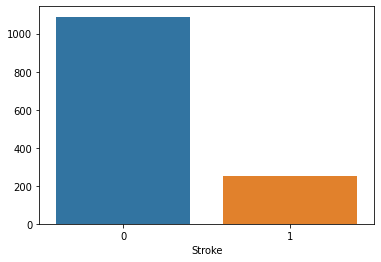

In [19]:
# Checking if Data is balanced
xs = data['stroke'].value_counts().index
ys = data['stroke'].value_counts().values

ax = sns.barplot(xs,ys)
ax.set_xlabel("Stroke")
plt.show()

# To balance the data

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (1742, 9) (1742,)
Test set: (436, 9) (436,)


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)
clf

LogisticRegression(solver='liblinear')

In [23]:
X_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoker
2031,1,0.856783,0,0,1,1,0.216194,0.233758,0
1710,1,0.743063,1,0,1,1,0.200006,0.385819,0
1798,1,0.992878,0,1,1,1,0.311489,0.208476,0
696,0,0.143836,0,0,0,0,0.163311,0.109091,0
943,0,0.914384,0,0,1,1,0.144005,0.463636,0
...,...,...,...,...,...,...,...,...,...
1957,0,0.988865,0,0,1,0,0.044737,0.317901,0
1419,0,0.923278,0,0,1,1,0.020257,0.241298,1
1417,0,0.769745,0,0,1,0,0.176450,0.248651,0
1443,0,0.832037,0,0,1,1,0.717773,0.255958,0


In [24]:
y_predict_prob = clf.predict_proba(X_test)
y_predict_prob

array([[0.31980108, 0.68019892],
       [0.38843108, 0.61156892],
       [0.12790152, 0.87209848],
       [0.96278417, 0.03721583],
       [0.28193854, 0.71806146],
       [0.17714525, 0.82285475],
       [0.54689289, 0.45310711],
       [0.12642699, 0.87357301],
       [0.98160885, 0.01839115],
       [0.73615553, 0.26384447],
       [0.87677654, 0.12322346],
       [0.14997943, 0.85002057],
       [0.205436  , 0.794564  ],
       [0.78349535, 0.21650465],
       [0.6309477 , 0.3690523 ],
       [0.61845161, 0.38154839],
       [0.29703783, 0.70296217],
       [0.26825241, 0.73174759],
       [0.22463174, 0.77536826],
       [0.9285198 , 0.0714802 ],
       [0.18419796, 0.81580204],
       [0.94305018, 0.05694982],
       [0.49243359, 0.50756641],
       [0.37843599, 0.62156401],
       [0.8983989 , 0.1016011 ],
       [0.91697716, 0.08302284],
       [0.24184946, 0.75815054],
       [0.70216266, 0.29783734],
       [0.20797587, 0.79202413],
       [0.14218926, 0.85781074],
       [0.

In [25]:
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))

Accuracy of Logistic regression classifier on train set: 0.7858783008036739
Accuracy of Logistic regression classifier on test set: 0.7522935779816514


In [26]:
array = np.arange(9).reshape(1,9)
array = array.astype(np.float64)


In [27]:
array[0][0]=0
array[0][1]=2
array[0][2]=30
array[0][3]=45
array[0][4]=12
array[0][5]=33
array[0][6]=31
array[0][7]=50
array[0][8]=13
array


array([[ 0.,  2., 30., 45., 12., 33., 31., 50., 13.]])

In [28]:
b = (array - np.min(array))/np.ptp(array)
b

array([[0.  , 0.04, 0.6 , 0.9 , 0.24, 0.66, 0.62, 1.  , 0.26]])

In [29]:
print(clf.predict(b))

[0]


C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve, roc_curve
import seaborn as sea

# Supervised learning_SVM

In [31]:
#Supervised learning_SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', gamma = 1.5,C = 2,max_iter=1000).fit(X_train, y_train)
print('Training Score:',clf.score(X_train,y_train))
print('Testing Score:',clf.score(X_test,y_test))

C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Score: 0.8283582089552238
Testing Score: 0.7798165137614679


              precision    recall  f1-score   support

           0       0.82      0.73      0.77       224
           1       0.75      0.83      0.79       212

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436



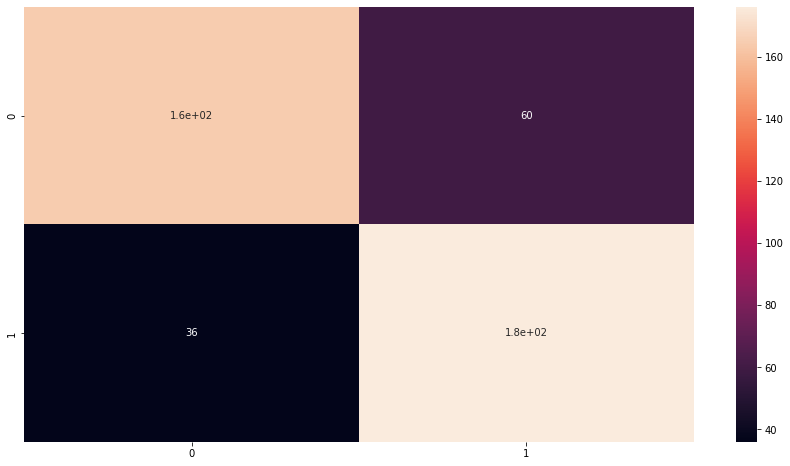

In [32]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

In [33]:
clf = SVC(kernel = 'rbf', gamma = 1.5,C = 20,max_iter=1000).fit(X_train, y_train)
print('Training Score:',clf.score(X_train,y_train))
print('Testing Score:',clf.score(X_test,y_test))

Training Score: 0.8576349024110218
Testing Score: 0.805045871559633


C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [34]:
clf = SVC(kernel = 'rbf', gamma = 100,C = 2,max_iter=1000).fit(X_train, y_train)
print('Training Score:',clf.score(X_train,y_train))
print('Testing Score:',clf.score(X_test,y_test))

C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Score: 0.9661308840413318
Testing Score: 0.8555045871559633


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       224
           1       0.85      0.86      0.85       212

    accuracy                           0.86       436
   macro avg       0.86      0.86      0.86       436
weighted avg       0.86      0.86      0.86       436



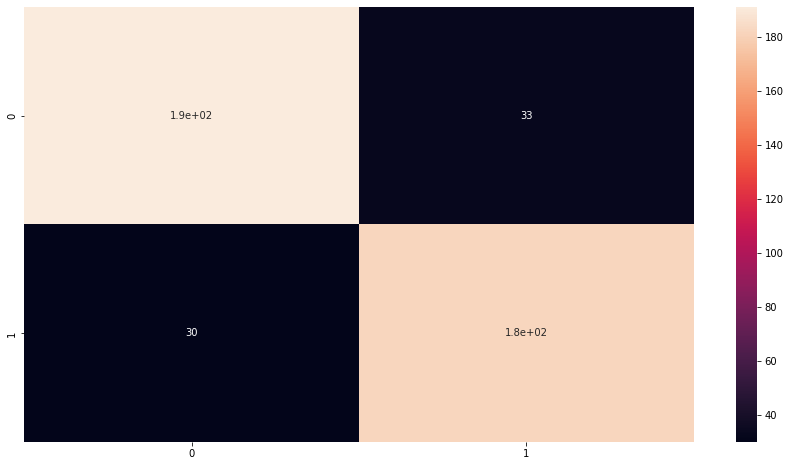

In [35]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_mc = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion_mc)
plt.figure(figsize=(15,8))
sea.heatmap(df_cm, annot=True)
plt.ylabe='True label'
plt.xlabel='Predicted label'

# RandomForestClassifier

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 87.16%


In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       224
           1       0.85      0.90      0.87       212

    accuracy                           0.87       436
   macro avg       0.87      0.87      0.87       436
weighted avg       0.87      0.87      0.87       436



C:\Users\Fawaz_Tujjar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


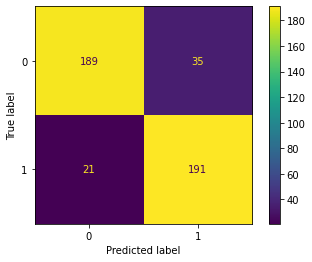

In [38]:
plot_confusion_matrix(pipeline, X_test, y_test)
plt.grid(False)
plt.show()